In [55]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [21]:
df=pd.DataFrame()

In [23]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [27]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [29]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

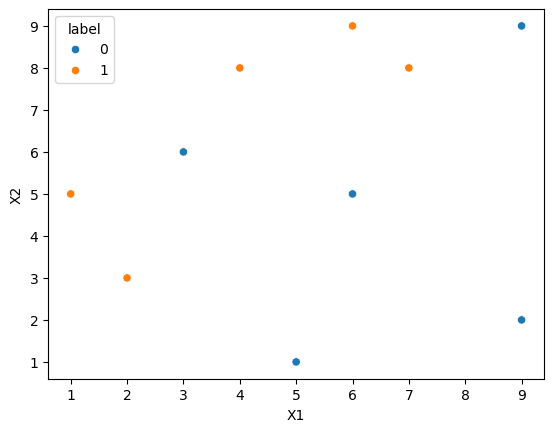

In [31]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [33]:
df['weight']=1/df.shape[0]

In [35]:
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf=DecisionTreeClassifier(max_depth=1)

In [49]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values
clf.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

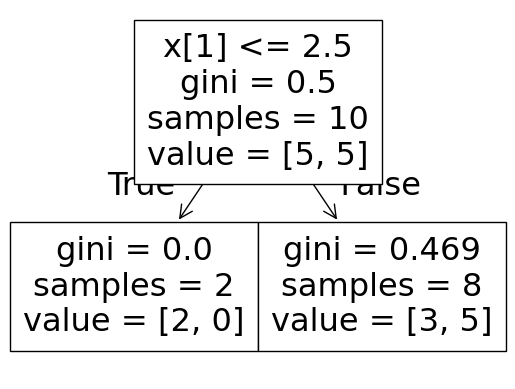

In [51]:
from sklearn.tree import plot_tree
plot_tree(clf)

<Axes: >

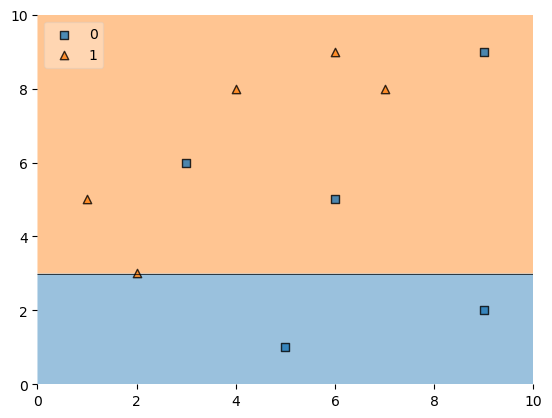

In [57]:
plot_decision_regions(X,y,clf=clf,legend=2)

In [91]:
df['y_pred']=clf.predict(X).astype(float)

In [93]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1.0
1,2,3,1,0.1,1.0
2,3,6,0,0.1,1.0
3,4,8,1,0.1,1.0
4,5,1,0,0.1,0.0
5,6,9,1,0.1,1.0
6,6,5,0,0.1,1.0
7,7,8,1,0.1,1.0
8,9,9,0,0.1,1.0
9,9,2,0,0.1,0.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      10 non-null     int64  
 1   X2      10 non-null     int64  
 2   label   10 non-null     int64  
 3   weight  10 non-null     float64
 4   y_pred  10 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 532.0 bytes


In [97]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [99]:
alpha1=calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [113]:
def update_row_weight(row, alpha):
    if row['label'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)


In [115]:
df['updated_weights'] = df.apply(update_row_weight, axis=1, alpha=0.423)

In [117]:
df.head()

,X1,X2,label,weight,y_pred,updated_weights
0,1,5,1,0.1,1.0,0.065508
1,2,3,1,0.1,1.0,0.065508
2,3,6,0,0.1,1.0,0.152653
3,4,8,1,0.1,1.0,0.065508
4,5,1,0,0.1,0.0,0.065508


In [129]:
df['updated_weights'].sum()

0.9165153319682015

In [134]:
df['normalized_weight']=df['updated_weights']/(df['updated_weights'].sum())

In [136]:
df

,X1,X2,label,weight,y_pred,updated_weights,normalized_weight
0,1,5,1,0.1,1.0,0.065508,0.071475
1,2,3,1,0.1,1.0,0.065508,0.071475
2,3,6,0,0.1,1.0,0.152653,0.166559
3,4,8,1,0.1,1.0,0.065508,0.071475
4,5,1,0,0.1,0.0,0.065508,0.071475
5,6,9,1,0.1,1.0,0.065508,0.071475
6,6,5,0,0.1,1.0,0.152653,0.166559
7,7,8,1,0.1,1.0,0.065508,0.071475
8,9,9,0,0.1,1.0,0.152653,0.166559
9,9,2,0,0.1,0.0,0.065508,0.071475


In [138]:
df['normalized_weight'].sum()

1.0

In [144]:
df['cumsum_upper']=np.cumsum(df['normalized_weight'])
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weight']

In [146]:
df.head()

,X1,X2,label,weight,y_pred,updated_weights,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1.0,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1.0,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1.0,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1.0,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0.0,0.065508,0.071475,0.452458,0.380983


In [148]:
def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']> a and a>row['cumsum_lower']:
                indices.append(index)
    return indices
            

In [150]:
index_values=create_new_dataset(df)

In [152]:
index_values

[2, 6, 8, 4, 4, 2, 1, 7, 2, 4]

In [162]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [164]:
dt2=DecisionTreeClassifier(max_depth=1)

In [170]:
X1=second_df.iloc[:,0:2].values
y1=second_df.iloc[:,2].values

In [172]:
dt2.fit(X1,y1)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.625, 0.5, '  False')]

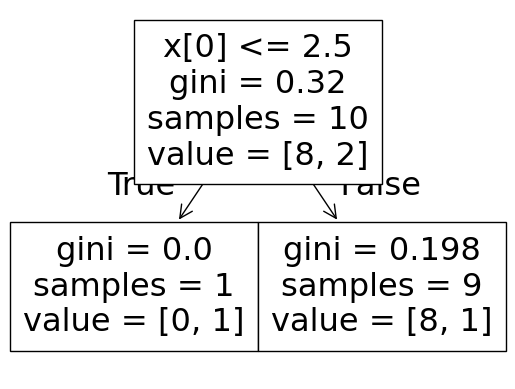

In [174]:
plot_tree(dt2)

<Axes: >

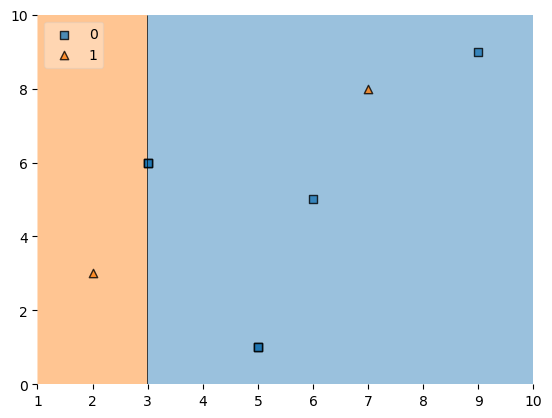

In [180]:
plot_decision_regions(X1,y1,clf=dt2,legend=2)

In [ ]:
dt2.